# Phase Diagram calculations with alphaMELTS and MAGEMin (via PetThermoTools)

The following notebook demonstrates the creation of phase diagrams for compositions relevant to Mauna Loa volcano, using a range of different thermodynamic models. Initial calculations were performed using the pMELTS, rhyolite-MELTS v1.0.2, and rhyolite-MELTS v1.2.0 thermodynamic models. These calculations are performed in Python using the PetThermoTools (v0.2.31) and alphaMELTS for Python (v2.3.1) packages. Detailed instructions for the installation of PetThermoTools and alphaMELTS for Python can be found on the PetThermoTools ReadtheDocs page (https://petthermotools.readthedocs.io/en/latest/Installation/InstallationScript.html). 

To assess the performance of other thermodynamic models calculations were also performed using the Holland et al. (2018), Green et al. (submitted), and Weller et al. (2024) thermodynamic models. This is achieved through the Julia packages MAGEMin_C (https://github.com/ComputationalThermodynamics/MAGEMin_C.jl) and the 'connector' package MAGEMinCalc (v0.4.0) which is designed to facilitate MAGEMin calculations from Python. For calculations performed using the Green et al. and Weller et al. thermodynamoc models we use MAGEMin_C v1.6.9, with an older version (v1.4.9 in this case) required to access the original Holland et al. 2018 thermodynamic model. As such, only calculations for the Green et al. and Weller et al. models are shown here.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PetThermoTools as ptt
import pickle
import os
import sys

# this can be useful for visualizing the phase diagrams - hover over the plots to see the phase assemblage
%matplotlib widget

# this allows figures to be saved as svg files with the text preserved
plt.rcParams['svg.fonttype'] = 'none'

# check the version
ptt.__version__

'0.2.31'

Calculations performed using the alphaMELTS for Python package can produce a huge number of outputs that are all printed in the notebook if you are running a Mac. Run the following code twice to suppress these outputs.

In [3]:
#### Suppress extensive MELTS outputs, RUN TWICE ####
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

If you want to perform calculations using the Green, Holland, or Weller thermodynamic models it is good to first check the pyjulia installation and compile the installed julia modules:

In [4]:
import julia
julia.install()
from julia.api import Julia
jl = Julia(compiled_modules=False)

# Load data

We will load in the data from the reverse fractional crystallization calculations reported in the main text and supplement of Wieser et al. (submitted), identifying the composition predicted at 16 wt% MgO for the different reverse crystallization models. We also set the H2O content of the melt to 0.2 wt%.

In [5]:
Data = pd.read_excel('Selected_Phase_Diagram_Compositions.xlsx', sheet_name="Consistency_MgO16")
Data['H2O_Liq'] = np.zeros(len(Data['H2O_Liq'])) + 0.2

We can now run the models using one of the rows in the loaded DataFrame as the bulk composition of the system. To minimize the risk of errors I generally load in the data as a Dictionary, converting from a row (here the 3rd row) in a DataFrame to a dictionary in the following way `pd.Series(Data.iloc[2]).to_dict()`. The calculations below are all performed using the reverse crystallization model at 16 wt% MgO using the Ariskin model for opx stability.

For these examples we keep the H2O content at 0.2 wt% (with the exception of the Weller et al. models where H2O is not included as an input variable), and the ferriciron to total iron ratio is set at 0.18.

For the MELTS thermodynamic models we are able to first run the calculations at a low grid resolution and then 'refine' the phase diagram by searching for areas where there are changes in the phase assemblage. This functionality is not currently available in MAGEMinCalc, although similar options are available in the Julia MAGEMinApp.

## pMELTS

In [6]:
# Run the calculations
pMELTS = ptt.phaseDiagram_calc(Model = "pMELTS", bulk = pd.Series(Data.iloc[2]).to_dict(), 
                               cores = 1, T_max_C=1350, T_min_C=1140, T_num=40,
                               P_min_bar=500, P_max_bar=15000, P_num=40, Fe3Fet_Liq=0.18, i_max = 300)
pMELTS = ptt.phaseDiagram_refine(Data = pMELTS, Model = "pMELTS", 
                            bulk = pd.Series(Data.iloc[2]).to_dict(), i_max = 300, Fe3Fet_Liq = 0.18)
    

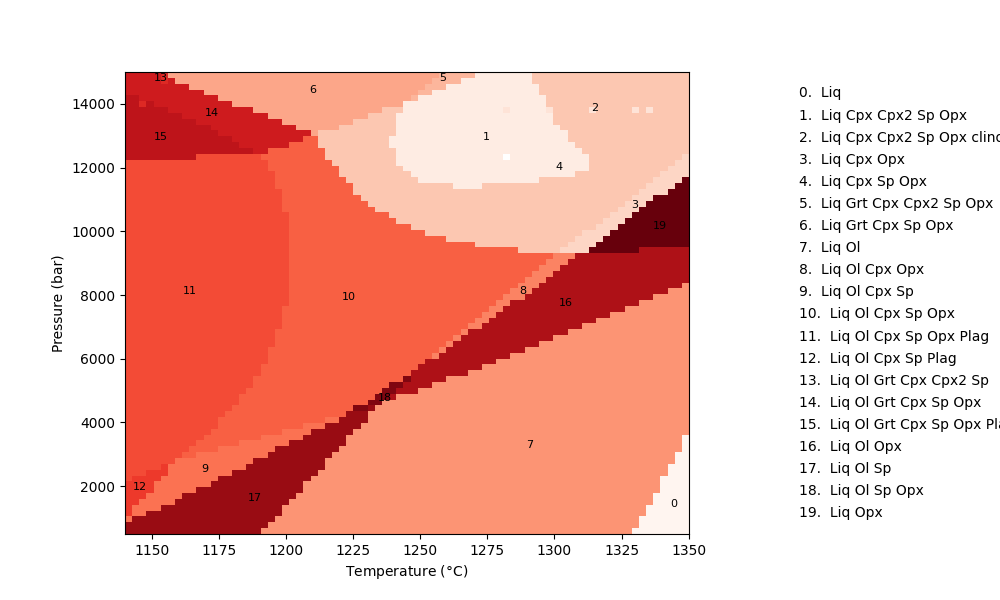

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: xlabel='Temperature ($\\degree$C)', ylabel='Pressure (bar)'>,
        <Axes: >], dtype=object))

In [7]:
# Plot the phase diagram
ptt.plot_phaseDiagram(Combined = pMELTS)

In [ ]:
# save the phase diagram output as a pickle
with open('pMELTS.pkl', "wb") as f:
    pickle.dump(pMELTS, f)

## rhyolite-MELTS v1.0.2

In [8]:
# Run the calculations
rMELTS102 = ptt.phaseDiagram_calc(Model = "MELTSv1.0.2", bulk = pd.Series(Data.iloc[2]).to_dict(), 
                               cores = 1, T_max_C=1350, T_min_C=1140, T_num=40,
                               P_min_bar=500, P_max_bar=15000, P_num=40, Fe3Fet_Liq=0.18, i_max = 300)
rMELTS102 = ptt.phaseDiagram_refine(Data = rMELTS102, Model = "MELTSv1.0.2", 
                            bulk = pd.Series(Data.iloc[2]).to_dict(), i_max = 300, Fe3Fet_Liq = 0.18)
    

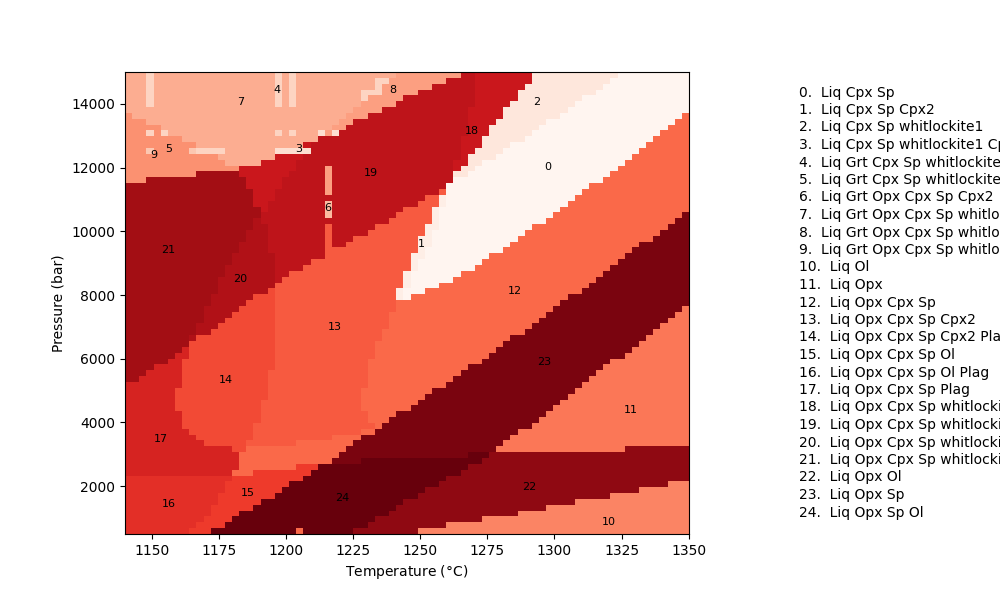

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: xlabel='Temperature ($\\degree$C)', ylabel='Pressure (bar)'>,
        <Axes: >], dtype=object))

In [9]:
# Plot the phase diagram
ptt.plot_phaseDiagram(Combined = rMELTS102)

In [ ]:
# save the phase diagram output as a pickle
with open('rMELTS102.pkl', "wb") as f:
    pickle.dump(rMELTS102, f)

## rhyolite-MELTS v1.2.0

In [10]:
# Run the calculations
rMELTS120 = ptt.phaseDiagram_calc(Model = "MELTSv1.2.0", bulk = pd.Series(Data.iloc[2]).to_dict(), 
                               cores = 1, T_max_C=1350, T_min_C=1140, T_num=40,
                               P_min_bar=500, P_max_bar=15000, P_num=40, Fe3Fet_Liq=0.18, i_max = 300)
rMELTS120 = ptt.phaseDiagram_refine(Data = rMELTS120, Model = "MELTSv1.2.0", 
                            bulk = pd.Series(Data.iloc[2]).to_dict(), i_max = 300, Fe3Fet_Liq = 0.18)
    

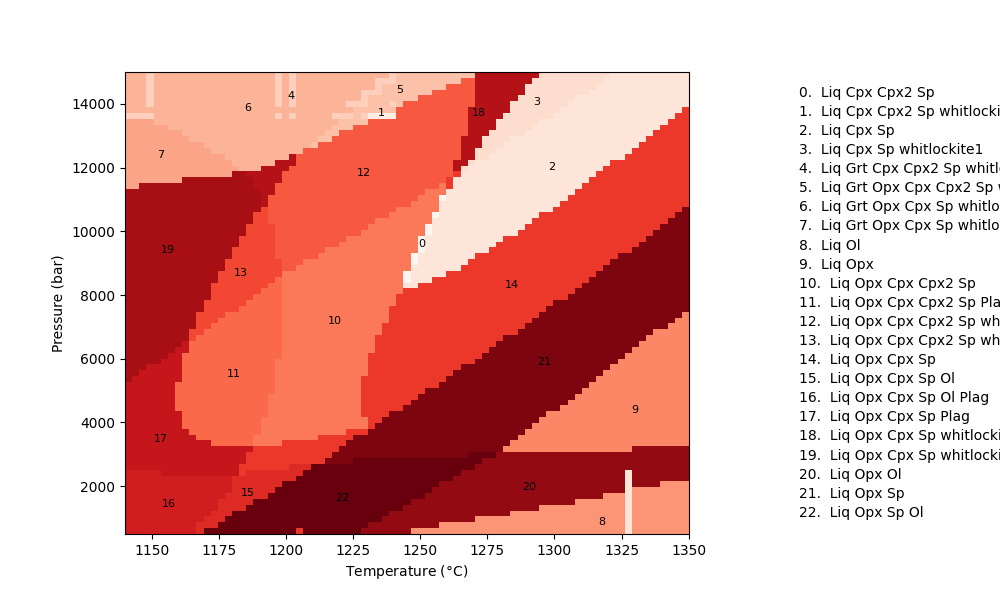

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: xlabel='Temperature ($\\degree$C)', ylabel='Pressure (bar)'>,
        <Axes: >], dtype=object))

In [11]:
# Plot the phase diagram
ptt.plot_phaseDiagram(Combined = rMELTS120)

In [ ]:
# save the phase diagram output as a pickle
with open('rMELTS120.pkl', "wb") as f:
    pickle.dump(rMELTS120, f)

## Green et al. (in review)

In [16]:
# Run the calculations
Green = ptt.phaseDiagram_calc(Model = "Green2025", bulk = pd.Series(Data.iloc[2]).to_dict(), 
                               cores = 8, T_max_C=1350, T_min_C=1140, T_num=80,
                               P_min_bar=500, P_max_bar=15000, P_num=80, Fe3Fet_Liq=0.18, i_max = 300)
    

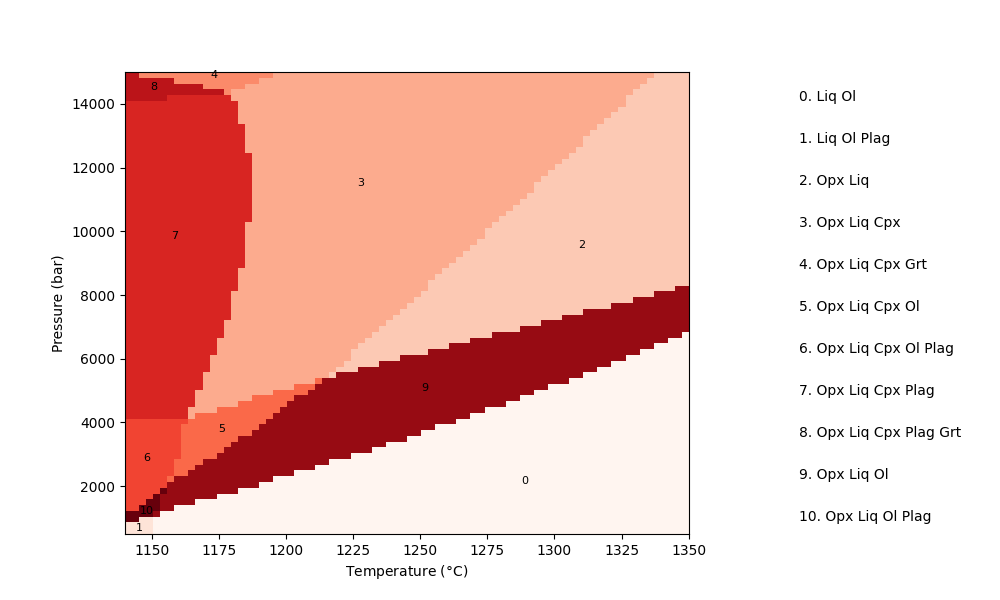

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: xlabel='Temperature ($\\degree$C)', ylabel='Pressure (bar)'>,
        <Axes: >], dtype=object))

In [17]:
# Plot the phase diagram
ptt.plot_phaseDiagram(Combined = Green)

In [ ]:
# save the phase diagram output as a pickle
with open('Green.pkl', "wb") as f:
    pickle.dump(Green, f)

## Weller et al. (2024)

In [18]:
# Run the calculations
Weller = ptt.phaseDiagram_calc(Model = "Weller2024", bulk = pd.Series(Data.iloc[2]).to_dict(), 
                               cores = 8, T_max_C=1350, T_min_C=1140, T_num=80,
                               P_min_bar=500, P_max_bar=15000, P_num=80, Fe3Fet_Liq=0.18, i_max = 300)
    

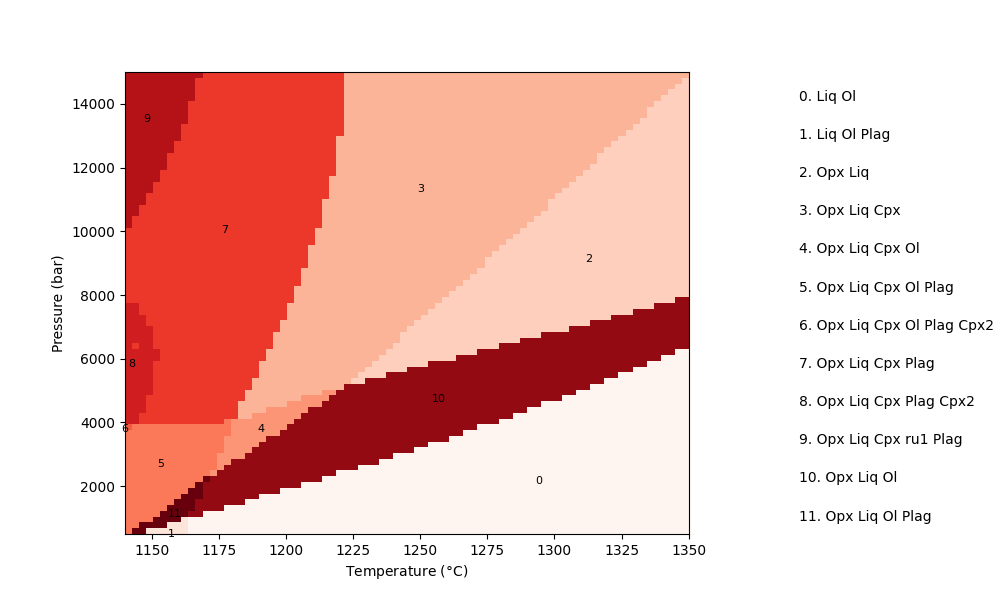

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: xlabel='Temperature ($\\degree$C)', ylabel='Pressure (bar)'>,
        <Axes: >], dtype=object))

In [19]:
# Plot the phase diagram
ptt.plot_phaseDiagram(Combined = Weller)

In [ ]:
# save the phase diagram output as a pickle
with open('Green.pkl', "wb") as f:
    pickle.dump(Green, f)